# Wave interference

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [290]:
sources = [ (-1,1), (1,-1) ] # positions of sources
amps    = [ 1.0, 1.0 ] # amplitudes
speeds  = [ 1.0, 1.0 ] # speeds
freqs   = [ 1.0, 1.0 ] # frequencies
phases  = [ 0.0, 0.0 ] # phases

periods = 1./np.array(freqs)

N = 1000
axlim = 3

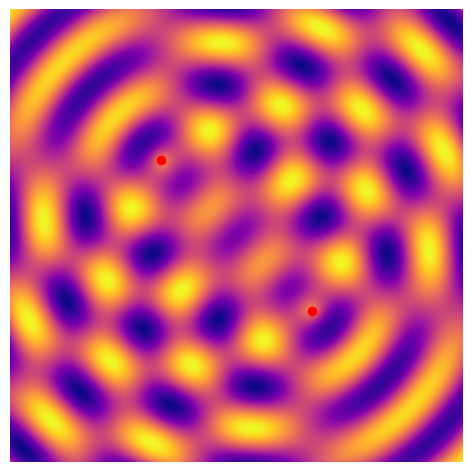

In [292]:
t=1

x = np.linspace(-axlim, axlim, N)
y = np.linspace(-axlim, axlim, N)
X, Y = np.meshgrid(x, y)
Z = np.zeros((N,N))

for A,s,f,c,p in zip(amps,sources,freqs,speeds,phases):
    l = c/f
    r = np.sqrt((X-s[0])**2+(Y-s[1])**2)
    Z += A*np.sin(2*np.pi*f*((c*t-r)/l-p))

fig, ax = plt.subplots(figsize=(6,6),dpi=100)
plt.imshow(Z,cmap="plasma") 
for x,y in sources:
    # change sign to X an Y since we are plotting on top of a matrix!
    plt.plot(N//2*-x/axlim+N//2,N//2*-y/axlim+N//2,"o",color="red")
plt.gca().set_aspect('equal')
# swap Y axis for consistency with coordinate settings
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

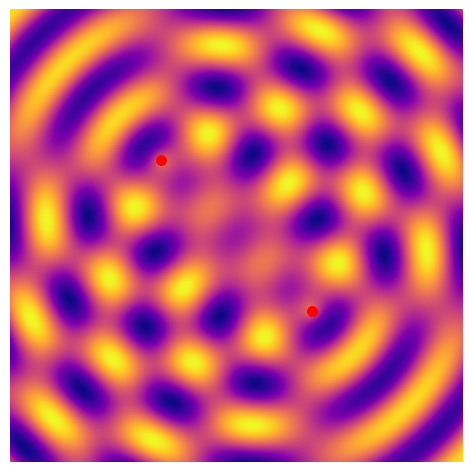

In [293]:
from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib inline
from IPython.display import HTML, Image

fig, ax = plt.subplots(figsize=(6,6),dpi=100)

Nt = 30
tmax = max(periods)
t = np.arange(0,tmax,tmax/Nt)

def wave_update(i):
    _t = t[i]
    Z = np.zeros((N,N))
    for s,f,c,p in zip(sources,freqs,speeds,phases):
        l = c/f
        r = np.sqrt((X-s[0])**2+(Y-s[1])**2)
        Z += np.sin(2*np.pi*f*((c*_t-r)/l+p))
    ax.imshow(Z,cmap="plasma")
    for x,y in sources:
        plt.plot(N//2*-x/axlim+N//2,N//2*-y/axlim+N//2,"o",color="red")    
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.axis('off')
 
anim = FuncAnimation(fig=fig, func=wave_update, frames=range(0,len(t)) )

HTML(anim.to_html5_video())

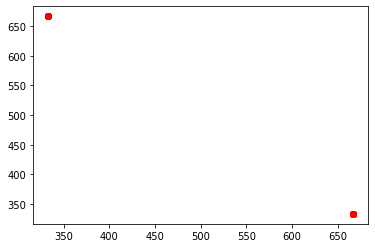

In [294]:
anim.save('gifs/waves.gif', writer='imagemagick', fps=15)

In [295]:
Image(url='gifs/waves.gif')

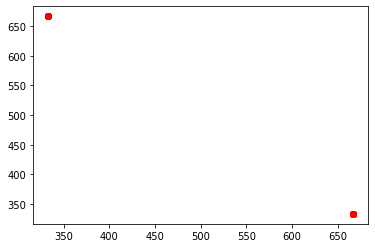

In [296]:
anim.save('movies/waves.mp4', writer=FFMpegWriter(fps=15))